In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, re

In [2]:
clusters_dir = '/Users/6j9/projects/sars_cov2-geospatial/data/clusters'
clusters_paths = [os.path.join(clusters_dir, x) for x in os.listdir(clusters_dir) if 'inflation' in x]
clusters_paths.sort()

In [3]:
cluster_sizes = {}
top_10 = []
top_20 = []
total_samples = 2000000
for cluster_path in clusters_paths:
    _, name = os.path.split(cluster_path)
    inflation = re.search('\d\.\d', name).group(0)
    top_10_sum = 0
    top_20_sum = 0
    with open(cluster_path) as clusters:
        for i, line in enumerate(clusters):
            seq_ids = line.strip().split(' ')
            num_seqs = len(seq_ids)
            if i < 10: top_10_sum += num_seqs
            if i < 20: top_20_sum += num_seqs
            if inflation in cluster_sizes.keys():
                cluster_sizes[inflation].append(num_seqs)
            else:
                cluster_sizes[inflation] = [num_seqs]
    top_10.append(round(top_10_sum / total_samples, 2))
    top_20.append(round(top_20_sum / total_samples, 2))
    
print(top_10)
print(top_20)

[0.7, 0.62, 0.61, 0.61, 0.55, 0.53, 0.36, 0.36, 0.33]
[0.87, 0.86, 0.84, 0.84, 0.74, 0.71, 0.64, 0.63, 0.6]


# Bar Plot

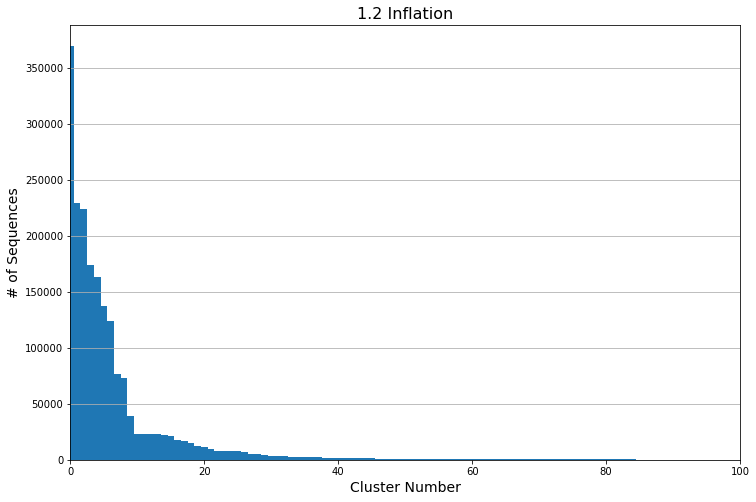

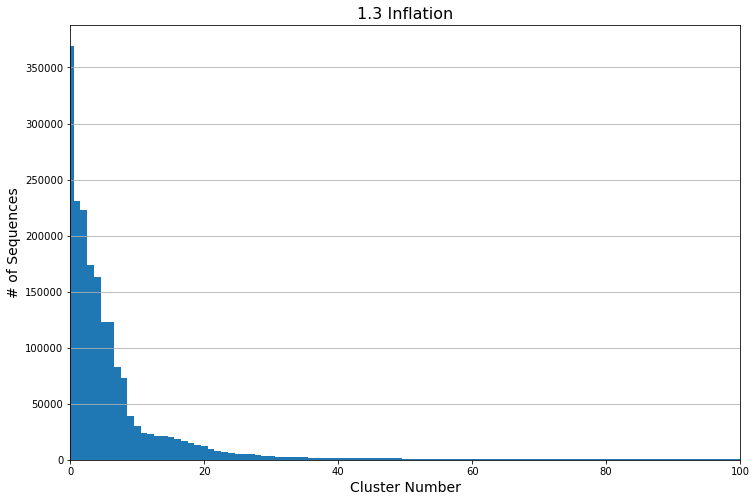

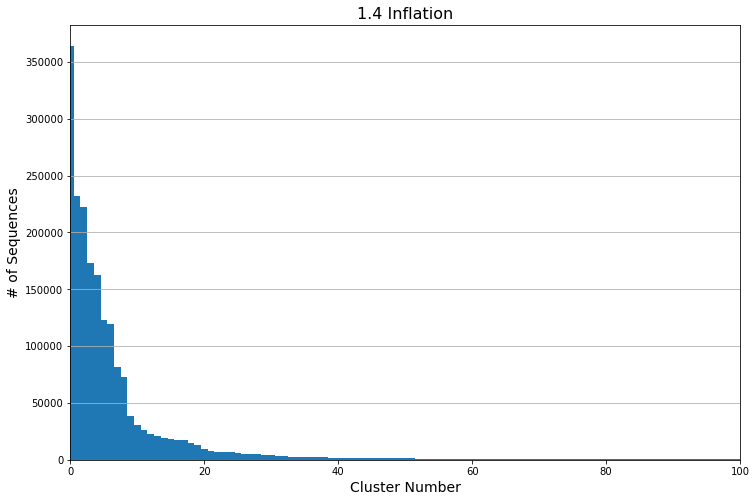

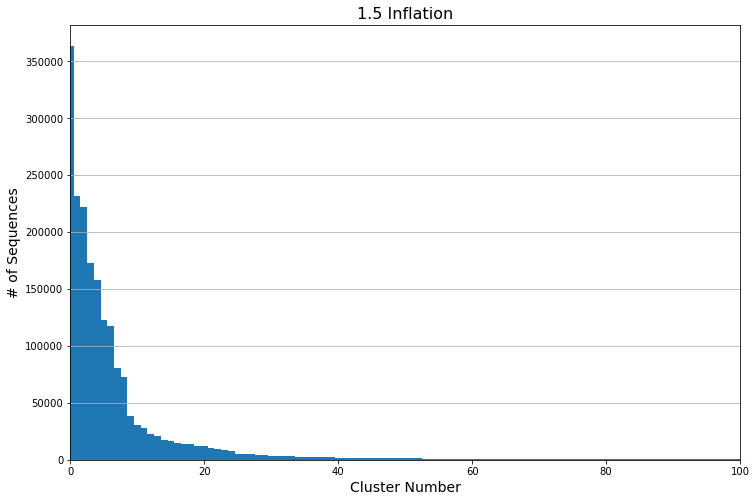

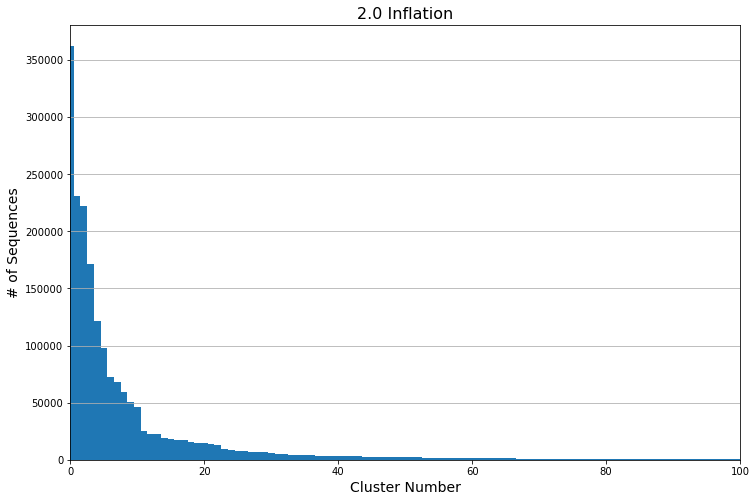

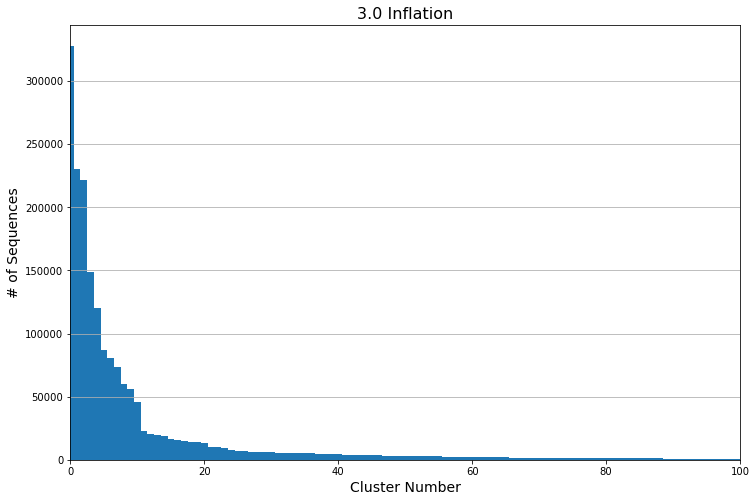

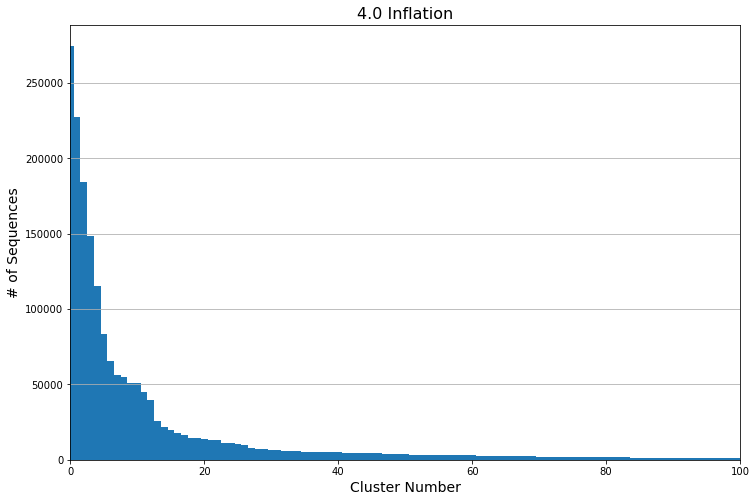

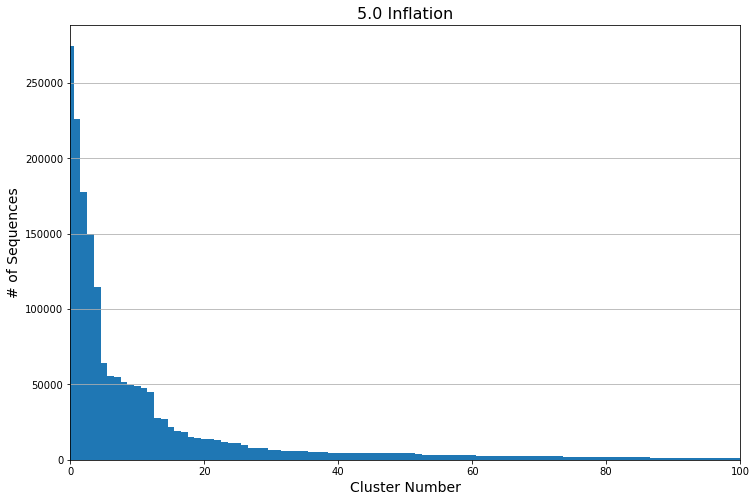

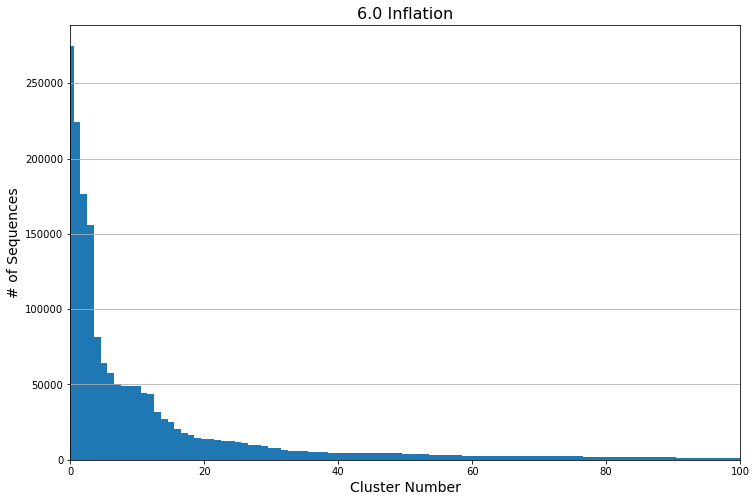

In [4]:
log = False
y_max = None
x_max = 100
grid = 'major'

for inf, sizes in cluster_sizes.items():
    sizes.sort()
    sizes = sizes[::-1]
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.arange(len(sizes))
    ax.bar(x, sizes, width=1.0)
    if x_max:
        ax.set_xlim([0, x_max])
    if y_max:
        ax.set_ylim([0, y_max])
    if log:
        ax.set_yscale('log')
    ax.set_title(f'{inf} Inflation', size=16)
    ax.set_xlabel('Cluster Number', size=14)
    if log:
        ax.set_ylabel('(log) # of Sequences', size=14)
    else:
        ax.set_ylabel('# of Sequences', size=14)
    if grid:
        ax.grid(which=grid, axis='y')
    plt.show()